In [1]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from __future__ import print_function

# Linear Algebra

## Q1: Condition number

For a linear system, ${\bf A x} = {\bf b}$, we can only solve for $x$ if the determinant of the matrix ${\bf A}$ is non-zero.  If the determinant is zero, then we call the matrix _singular_.  The _condition number_ of a matrix is a measure of how close we are to being singular.  The formal definition is:
\begin{equation}
\mathrm{cond}({\bf A}) = \| {\bf A}\| \| {\bf A}^{-1} \|
\end{equation}
But we can think of it as a measure of how much ${\bf x}$ would change due to a small change in ${\bf b}$.  A large condition number means that our solution for ${\bf x}$ could be inaccurate.

A _Hilbert matrix_ has $H_{ij} = (i + j + 1)^{-1}$, and is known to have a large condition number.  Here's a routine to generate a Hilbert matrix

In [2]:
def hilbert(n):
    """ return a Hilbert matrix, H_ij = (i + j - 1)^{-1} """

    H = np.zeros((n,n), dtype=np.float64)

    for i in range(1, n+1):
        for j in range(1, n+1):
            H[i-1,j-1] = 1.0/(i + j - 1.0)
    return H

Let's solve ${\bf Hx} ={\bf b}$.  Create a linear system by picking an ${\bf x}$ and generating a ${\bf b}$ by multiplying by the matrix ${\bf H}$.  Then use the `scipy.linalg.solve()` function to recover ${\bf x}$.  Compute the error in ${\bf x}$ as a function of the size of the matrix.

You won't need a large matrix, $n \sim 13$ or so, will start showing big errors.

You can compute the condition number with `numpy.linalg.cond()`

There are methods that can do a better job with nearly-singular matricies.  Take a look at `scipy.linalg.lstsq()` for example.

---
### My solution:

For each value of $n$, 


- generate a random vector $\mathbf{y}$ filled with values between 0 and 1. 


- Calculate $\mathbf{b} = \mathbf{H} \mathbf{y}$. 


- Then solve $\mathbf{H x} = \mathbf{b}$ for $\mathbf{x}$, and calculate the error as $\sqrt{ \left| \mathbf{x} - \mathbf{y}  \right|^2}$.

Then make a plot of the error as a function of $n$, and the condition number as a function of $n$.

In [3]:
import scipy.linalg
import random

# values of n
nvals = range(2,16)
errors = []
condition_nums = []
for n in nvals:
    # get the Hilbert matrix
    H = hilbert(n)
    # calculate condition number
    c = np.linalg.cond(H)
    # generate y
    y = np.array([random.random() for i in range(n)])
    # calculate b
    b = np.matmul(H,y)
    # solve Hx = b for x
    x = scipy.linalg.solve(H, b)
    # calculate the error
    diff = x - y
    error = np.sqrt(np.sum(diff**2))
    # print out results
    print("n = {:2d}, condition number = {:6.3e}, error = {:6.3e}".format(n,c,error))
    errors.append(error)
    condition_nums.append(c)

n =  2, condition number = 1.928e+01, error = 2.545e-16
n =  3, condition number = 5.241e+02, error = 1.858e-15
n =  4, condition number = 1.551e+04, error = 1.002e-13
n =  5, condition number = 4.766e+05, error = 6.674e-12
n =  6, condition number = 1.495e+07, error = 4.346e-10
n =  7, condition number = 4.754e+08, error = 1.107e-08
n =  8, condition number = 1.526e+10, error = 2.641e-07
n =  9, condition number = 4.932e+11, error = 9.389e-06
n = 10, condition number = 1.603e+13, error = 1.978e-05
n = 11, condition number = 5.220e+14, error = 1.658e-02
n = 12, condition number = 1.621e+16, error = 3.905e-01
n = 13, condition number = 4.786e+17, error = 3.839e+00
n = 14, condition number = 2.551e+17, error = 9.875e+00
n = 15, condition number = 2.496e+17, error = 1.846e+00


/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:18: LinAlgWarning: Ill-conditioned matrix (rcond=2.34967e-17): result may not be accurate.
/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:18: LinAlgWarning: Ill-conditioned matrix (rcond=1.28868e-18): result may not be accurate.
/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:18: LinAlgWarning: Ill-conditioned matrix (rcond=1.01671e-18): result may not be accurate.
/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:18: LinAlgWarning: Ill-conditioned matrix (rcond=8.18724e-19): result may not be accurate.


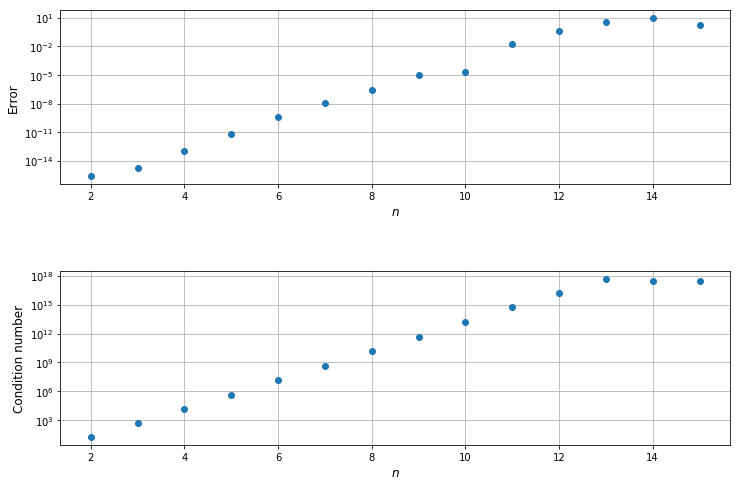

In [4]:
fig = plt.figure(figsize=(12,8))

# plot error vs n
ax1 = plt.subplot(211)
ax1.set_yscale('log')
ax1.set_xlabel(r"$n$", fontsize=12)
ax1.set_ylabel("Error", fontsize=12)
ax1.plot(nvals, errors, 'o')
ax1.grid()

# plot condition number vs n
ax2 = plt.subplot(212)
ax2.set_yscale('log')
ax2.set_xlabel(r"$n$", fontsize=12)
ax2.set_ylabel("Condition number", fontsize=12)
ax2.plot(nvals, condition_nums, 'o')
ax2.grid()

plt.subplots_adjust(hspace=0.5)
plt.show()

---
# FFTs

## Q2: Noisy signal

A convolution is defined as:                                                             
  \begin{equation}                                                                           
    (f \star g)(t) \equiv \int_{-\infty}^{\infty} f(\tau) g(t - \tau) d\tau                   
  \end{equation}                                                                             
  It is easy to compute this with FFTs, via the _convolution theorem_,                                                                        
  \begin{equation}                                                                                                                                                  
    \mathcal{F}\{f \star g\} = \mathcal{F}\{f\} \, \mathcal{F}\{g\}                                                                                                 
  \end{equation}                                                                                                                                                    
  That is the Fourier transform of the convolution of $f$ and $g$ is simply
  the product of the individual transforms of $f$ and $g$.  This allows us
  to compute the convolution via multiplication in Fourier space and then take
  the inverse transform, $\mathcal{F}^{-1}\{\}$, to recover the convolution                   in real space:                                                                             
  \begin{equation}                                                                               f \star g = \mathcal{F}^{-1}\{ \mathcal{F}\{f\} \, \mathcal{F}\{g\}\}                     \end{equation}            
  
A common use of a convolution is to smooth noisy data, for example by convolving noisy data with a Gaussian.  We'll do that here.

Here's some noisy data we'll work with

In [5]:
def fdata(x, L):
    A = L/10.0
    return 2*np.sin(2*np.pi*x/L) + x*(L-x)**2/L**3 * np.cos(x) + \
           5*x*(L-x)/L**2 + A/2 + 0.1*A*np.sin(13*np.pi*x/L)

N = 2048
L = 50.0
x = np.linspace(0, L, N, endpoint=False)
orig = fdata(x, L)
noisy = orig + 0.5*np.random.randn(N)

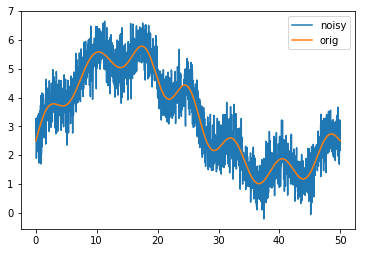

In [6]:
plt.plot(x, noisy, label="noisy")
plt.plot(x, orig, label="orig")
plt.legend()

SciPy provides a convolution function `scipy.signal.convolve()` that can do the convolution for us directly.  To smooth the data, we want to use a Gaussian, which can be produced by `scipy.signal.gaussian()`.

Convolve the noisy data with a Gaussian and plot the result together with the original data `orig`.  You'll need to play with the width of the Gaussian to get a nice smoothing.  You also will need to normalize the Gaussian so that it sums to 1, otherwise, your convolved data will be shifted verfically from the original function.

---
### My solution:

In [12]:
import scipy.signal as signal, scipy.integrate as integrate

# get the gaussian window
sigma=25.0
gauss = signal.gaussian(N,sigma, sym=False)

# need to normalize the window - integrate it from xmin to xmax
normalization = integrate.simps(gauss, dx=x[1]-x[0])
gauss /= normalization
print("normalization = ", normalization)
print("integral over all points after normalization = ", integrate.simps(gauss, dx=x[1]-x[0]))

# do the convolution
convolution = signal.convolve(noisy, gauss, mode="same")

normalization =  1.52992448403
integral over all points after normalization =  1.0


Make the plot:

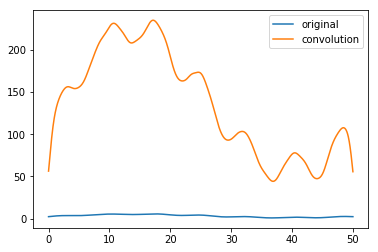

In [8]:
fig, ax = plt.subplots()

ax.plot(x, orig, label="original")
ax.plot(x, convolution, label="convolution")
ax.legend()

plt.show()

Not sure what's going wrong? Especially since the gaussian seems be to normalized.

---

### My solutions end here

I didn't get a chance to complete the questions below.

---

## <span class="fa fa-star"></span> Q3: FFT of chaotic pendulum

Last time we looked at ODEs and the chaotic pendulum, and were interested in writing a method to integrate the pendulum in time.

Here we want to examine its behavior in frequency space.  The code below will integrate the chaotic pendulum, while requesting that the solution be stored at points spaced with a fixed dt, which makes it suitable for taking the FFT.

In [9]:
from functools import partial
from scipy.integrate import solve_ivp

def rhs(t, Y, q, omega_d, b):
    """ damped driven pendulum system derivatives.  Here, Y = (theta, omega) are
        the solution variables. """
    f = np.zeros_like(Y)
        
    f[0] = Y[1]
    f[1] = -q*Y[1] - np.sin(Y[0]) + b*np.cos(omega_d*t)

    return f

def restrict_theta(theta):
    """ convert theta to be restricted to lie between -pi and pi"""
    tnew = theta + np.pi
    tnew += -2.0*np.pi*np.floor(tnew/(2.0*np.pi))
    tnew -= np.pi
    return tnew

def int_pendulum(theta0, q, omega_d, b, tend, dt):
    """ integrate the pendulum and return solution with dt"""

    # points in time where we'll request the solution
    tpoints = np.arange(0.0, tend, dt)
    
    r = solve_ivp(partial(rhs, q=q, omega_d=omega_d, b=b),
                  [0.0, tend], [theta0, 0.0],
                  method='RK45', t_eval=tpoints)

    return r.t, r.y

The call below will give an undamped pendulum.  For a small amplitude, since we have $L = g$ in our pendulum, the period is simply $T = 2\pi$, and the frequency is $\nu_k = 1/(2\pi)$.  We plot things in terms of angular frequency, $\omega_k = 2\pi \nu_k$, so all the power will be at $\omega_k = 1$.

In [10]:
t, y = int_pendulum(np.radians(10), 0.0, 0.6666, 0.0, 200.0, 0.1)

Your task is to complete the power spectrum routine below to calculate the FFT of theta and plot it.  Experiment with the damping and driving parameters to see the complexity of the pendulum in frequency space when it becomes chaotic.  For reference, here's a plot of the solution theta

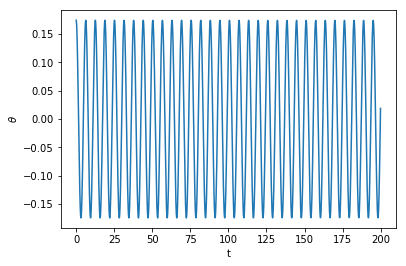

In [11]:

plt.plot(t, restrict_theta(y[0,:]))
plt.xlabel("t")
plt.ylabel(r"$\theta$")

# Fitting

## Q4: Let's find the errors on our fit

We looked at fits, but not what the errors are on the fit.  Look at `scipy.optimize.curve_fit()`.  This is a simplified wrapper on the least squares fitting.  It can return the convariance matrix, the diagonals of which can give the error of the fit for the parameters.  

Make up some data that models a non-linear function (by introducing some random noise) and perform a fit and find the errors on the parameters.